In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D.Sampling import *
from PDE2D import DIM
from mitsuba import Float, PCG32
from PDE2D.Sampling import GreensFunctionAnalytic, GreensFunctionPolynomial

In [2]:
dim = DIM.Two
grad = False
newton_steps = 8
z = Float(1.5)
R = Float(1)
σ = dr.square(z / R)
npoints = 1000000
seed = 32
sampler = PCG32(npoints)
np.random.seed(42)
init_state = np.random.randint(sys.maxsize, size = npoints)
init_seq = np.random.randint(sys.maxsize, size = npoints)
sampler.seed(initstate = init_state, initseq = init_seq)

In [3]:
gf_analytic = GreensFunctionAnalytic(dim = dim, newton_steps = newton_steps, grad = grad)
gf_pol = GreensFunctionPolynomial(dim = dim, newton_steps = newton_steps, grad = grad, ncoeffs=8)

In [4]:
n = 9999
r = dr.arange(Float, n+1) / n * R
fnc = gf_analytic.eval(r, R, σ)
pdf, cdf, norm = gf_analytic.eval_pdf(r, R, σ)
fncc = gf_analytic.eval(r, R, Float(0))
pdfc, cdfc, normc = gf_analytic.eval_pdf(r, R, Float(0))
gf_pol.initialize(R * dr.sqrt(σ))
fnc_pol = gf_pol.eval(r, R, σ)
pdf_pol, cdf_pol, norm_pol = gf_pol.eval_pdf(r, R, σ)
fncc_pol= gf_pol.eval(r, R, Float(0))
pdfc_pol, cdfc_pol, normc_pol = gf_pol.eval_pdf(r, R, Float(0))

print(dr.sum(fnc) * R / n)
print(norm)
print(dr.sum(fncc) * R / n)
print(normc)

[0.174548]
[0.174548]
[0.25]
[0.25]


In [5]:
print(dr.sum(fnc_pol)   * R / n)
print(norm_pol)
print(gf_pol.eval_norm(R, σ))
print(dr.sum(fncc_pol)  * R / n)
print(normc_pol)
print(gf_pol.eval_norm(R, 0))

[0.174548]
[0.174548]
[0.174548]
[0.174548]
[0.174548]
[0.174548]


In [6]:
fnc, fnc_pol

([0, 0.000879175, 0.00161971, .. 9994 skipped .., 0.000121326, 6.06078e-05, 0],
 [0, 0.000879175, 0.00161971, .. 9994 skipped .., 0.000121386, 6.0577e-05, -5.96046e-08])

In [7]:
cdf, cdf_pol

([0, 1.00191e-07, 8.46239e-07, .. 9994 skipped .., 0.999999, 0.999999, 1],
 [0, 2.66194e-07, 9.85337e-07, .. 9994 skipped .., 1, 1, 1])

In [8]:
pdf, pdf_pol

([0, 0.00503686, 0.00927942, .. 9994 skipped .., 0.000695089, 0.000347227, 0],
 [0, 0.00503686, 0.00927942, .. 9994 skipped .., 0.00069543, 0.000347051, -3.4148e-07])

In [9]:
print(dr.sum(pdf) * R / n)
print(dr.sum(pdfc) * R / n)
print(dr.sum(pdf_pol) * R / n)
print(dr.sum(pdfc_pol) * R / n)

[1]
[1]
[1]
[1]


Text(0.5, 0.98, 'Analytic')

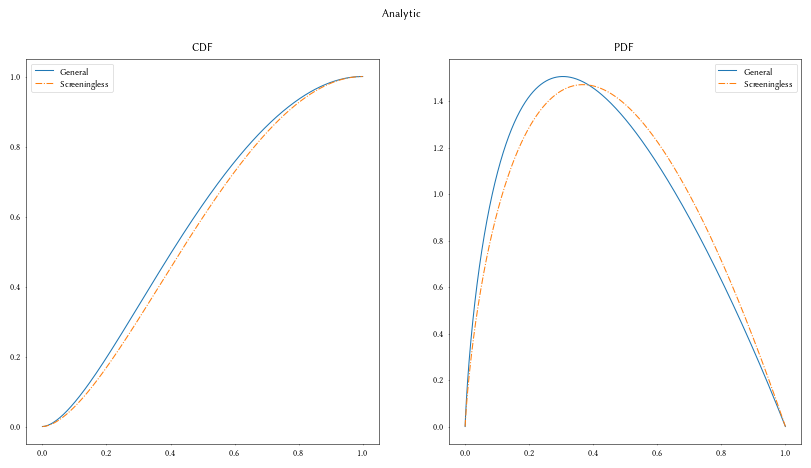

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(r.numpy(), cdf.numpy(), label = "General")
ax1.plot(r.numpy(), cdfc.numpy(), label = "Screeningless", ls = "-.")
ax2.plot(r.numpy(), pdf.numpy(), label = "General")
ax2.plot(r.numpy(), pdfc.numpy(), label = "Screeningless", ls = "-.")

ax1.legend()
ax2.legend()
ax1.set_title("CDF")
ax2.set_title("PDF")
fig.suptitle("Analytic")

Text(0.5, 0.98, 'Polynomial')

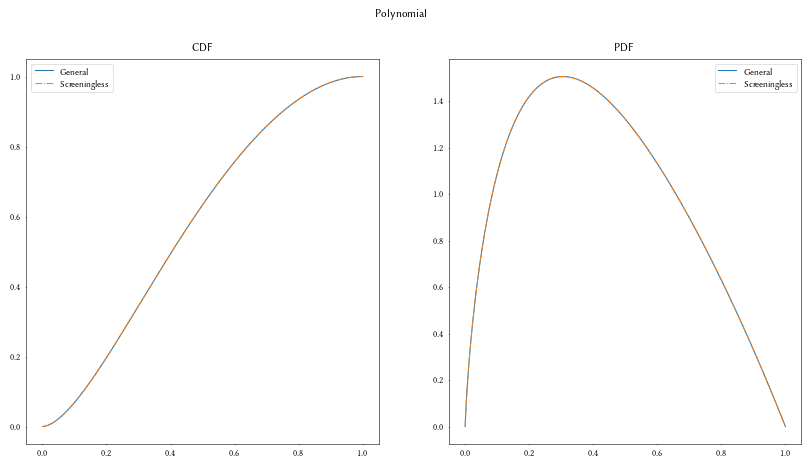

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(r.numpy(), cdf_pol.numpy(), label = "General")
ax1.plot(r.numpy(), cdfc_pol.numpy(), label = "Screeningless", ls = "-.")
ax2.plot(r.numpy(), pdf_pol.numpy(), label = "General")
ax2.plot(r.numpy(), pdfc_pol.numpy(), label = "Screeningless", ls = "-.")

ax1.legend()
ax2.legend()
ax1.set_title("CDF")
ax2.set_title("PDF")
fig.suptitle("Polynomial")

Text(0.5, 0.98, 'Comparison')

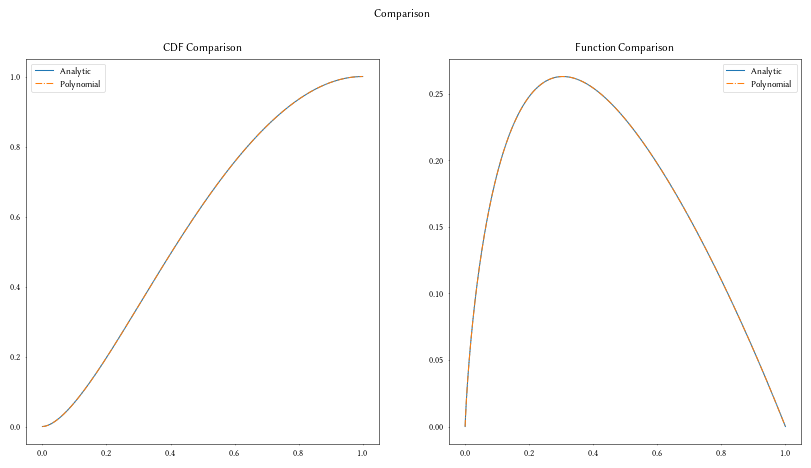

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(r.numpy(), cdf.numpy(), label = "Analytic")
ax1.plot(r.numpy(), cdf_pol.numpy(), label = "Polynomial", ls = "-.")

ax2.plot(r.numpy(), fnc.numpy(), label = "Analytic")
ax2.plot(r.numpy(), fnc_pol.numpy(), label = "Polynomial", ls = "-.")


ax1.legend()
ax2.legend()
ax1.set_title("CDF Comparison")
ax2.set_title("Function Comparison")
fig.suptitle("Comparison")

Text(0.5, 0.98, 'Relative Error')

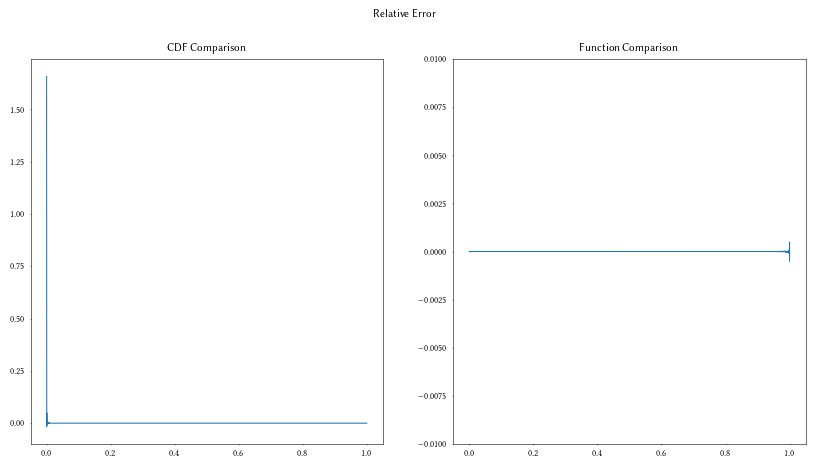

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(r.numpy(), ((cdf_pol -cdf)/ cdf).numpy())
ax2.plot(r.numpy(), ((fnc_pol -fnc)/ fnc).numpy())

ax2.set_ylim([-1e-2,1e-2])

ax1.set_title("CDF Comparison")
ax2.set_title("Function Comparison")
fig.suptitle("Relative Error")

In [14]:
sample = sampler.next_float32()

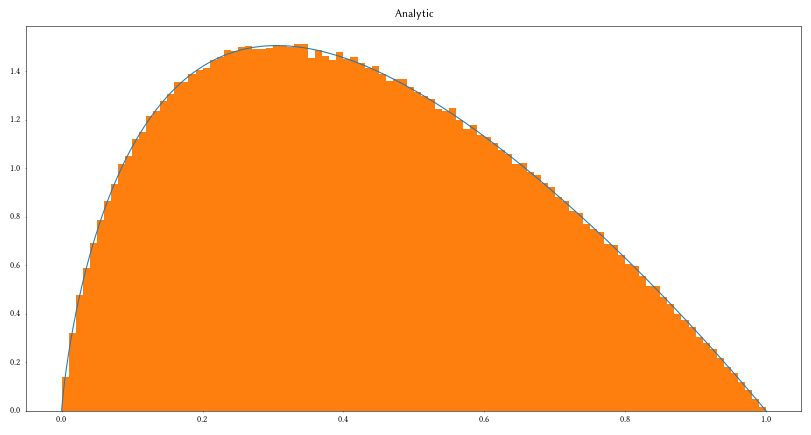

In [15]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
sample_analytic, norm_analytic = gf_analytic.sample(Float(sample), R, σ)
ax1.plot(r.numpy(), pdf.numpy())
ax1.set_title("Analytic")
ax1.hist(sample_analytic.numpy(), density = True, bins = 100);

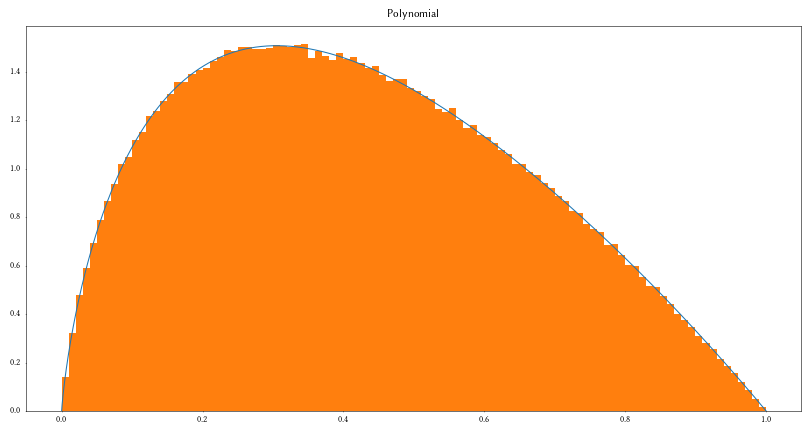

In [16]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
sample_pol, norm_pol = gf_pol.sample(Float(sample), R, σ)
ax1.plot(r.numpy(), pdf_pol.numpy())
ax1.set_title("Polynomial")
ax1.hist((sample_pol).numpy(), density = True, bins = 100);

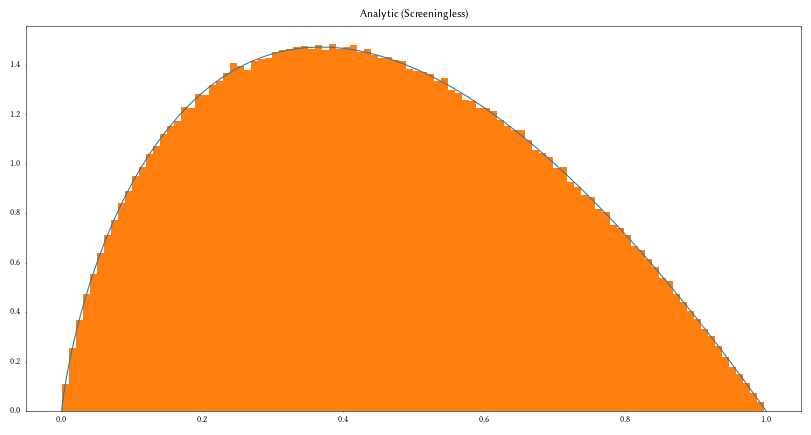

In [17]:
sample = sampler.next_float32()
sample_analytic, norm = gf_analytic.sample(Float(sample), R, Float(0))
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
ax1.plot(r.numpy(), pdfc.numpy())
ax1.set_title("Analytic (Screeningless)")
ax1.hist(sample_analytic.numpy(), density = True, bins = 100);

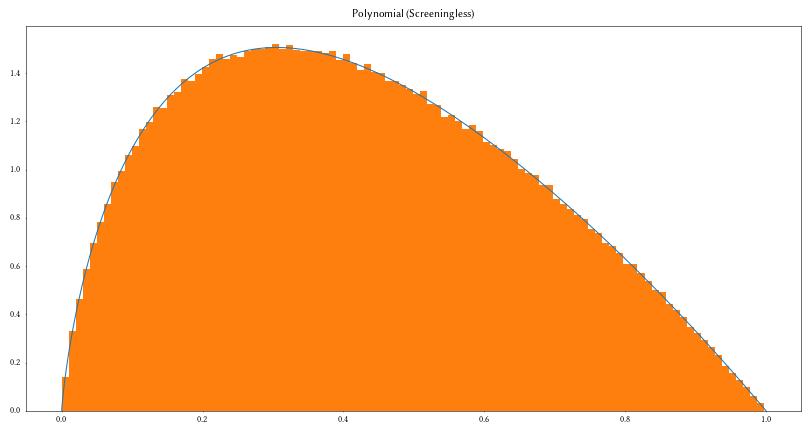

In [18]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
sample_pol, norm_pol = gf_pol.sample(Float(sample), R, Float(0))
ax1.plot(r.numpy(), pdfc_pol.numpy())
ax1.set_title("Polynomial (Screeningless)")
ax1.hist((sample_pol).numpy(), density = True, bins = 100);